### 캐글즐기기 파트4 * Bayesian Statistics: Techniques and Models

### link : https://www.coursera.org/learn/mcmc-bayesian-statistics
### (베이지안) Week2. Markov chain Monte Carlo (MCMC) - 이상열

### Ref1 : http://datum.io/tag/%EB%A9%94%ED%8A%B8%EB%A1%9C%ED%8F%B4%EB%A6%AC%EC%8A%A4-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/

### Ref2 : http://freesearch.pe.kr/archives/3877

### Module Overview
#### 4. Metropolis-Hastings (5/24, 5/31)
    - Algorithm
    - Demonstration
    - Random walk example, Part 1
    - Random walk example, Part 2
    - Quiz: Lesson 4
    - Code for Lesson 4

#### JAGS (5/31)
    - Download, install, setup3 min
    - Model writing, running, and post-processing
    - Alternative MCMC software10 min
    - Code from JAGS introduction

#### 5. Gibbs Sampling (5/31)
    - Multiple parameter sampling and full conditional distributions8 min
    - Conditionally conjugate prior example with Normal likelihood10 min
    - Computing example with Normal likelihood16 min
    - Quiz: Lesson 5
    - Code for Lesson 5

#### 6. Assessing Convergence (5/31)
    - Trace plots, autocorrelation
    - Autocorrelation
    - Multiple chains, burn-in, Gelman-Rubin diagnostic
    - Quiz: Lesson 6
    - Code for Lesson 6

#### Learning Objectives
- Understand the basics of MCMC including Metropolis-Hastings and Gibbs sampling.
- Write a statistical model in JAGS and produce posterior samples by calling JAGS from R.
- Assess MCMC output to determine if it is suitable for inference.



#### Algorithm

- Metropolis-Hastings은 일반 확률 분포에서 샘플을 추출 할 수있는 알고리즘입니다. 정규 분포를 모르는 경우에도 목표 분포라고 부릅니다. 우리는 찾고있는 목표 분포가 고정 분포 인 마르코프 체인을 구성하고 샘플링합니다.

- 임의의 시작 값을 선택하고 샘플링하기 쉬운 다른 분포에서 가져온 후보 샘플을 반복적으로 수락하거나 거부하는 것으로 구성됩니다.


![](img/week2_1.png)

- 첫 번째 단계는 theta의 초기 값을 선택하는 것입니다.
- 두 번째 단계는 많은 수의 반복에 대한 것이므로 1에서부터 큰 m까지 우리는 다음을 반복 할 것입니다.
    - 우리가 할 첫 번째 일은 후보자를 찾는 것입니다.
    - 우리는 그 세타 스타를 우리 후보로 부를 것입니다. 그리고 우리는 이것을 제안 배포판에서 끌어낼 것입니다.
    - 우리는 이전 반복의 세타 값이 주어지면 theta-star의 제안 배포 q를 호출 할 것입니다. 우리는 곧이 q 배포에 대해 더 많은 것을 알게 될 것입니다.
    - 다음 단계는 다음 비율을 계산하는 것입니다. 우리는 이것을 알파라고 부를 것입니다.
    - 후보로 평가 된이 g 함수는 이전 반복이 주어진 후보에서 평가 된 분포 또는 밀도 q로 나눈 값입니다.
    - 그리고 이 모든 것은 이전 반복에서 평가 된 g로 나뉩니다.
    - 다음 단계는 일단 알파를 계산하면 알파를 확인하는 것입니다.
    - 1보다 크거나 같으면 후보를 수락(다음 분포로 정함) 할 것입니다.
    - 그래서 우리는 후보 세타 스타를 받아들이고, 우리의 현재 세타 반복을 설정합니다.
    - 제안 된 후보자로의 이동이 유리한 경우, 즉 알파가 1보다 큰 경우 해당 항목으로 이동할 것입니다. 유리하지 않다면 우리는 여전히 그곳으로 이동할 것입니다.
    - 후보자로 옮기기로 한 우리의 결정은 현재 사슬이 어디에 있는지에 달려 있기 때문에 이것은 마르코프 사슬입니다. 하나의 신중한 선택은 후보가 배포 q를 생성하는 것입니다.

- 또 다른 인기있는 옵션, 이전 반복에 의존하는 것은 랜덤 워크 Metropolis-Hastings라고합니다. 여기서 제안 배포는 이전 반복을 중심으로 이루어집니다. 예를 들어, 평균이 우리의 이전 반복 theta i에서 1을 뺀 정규 분포 일 수 있습니다. 정규 분포가 평균을 중심으로 대칭이기 때문에이 예제는 또 다른 장점이 있습니다.

- 우리가 앞으로의 예에서 보게 될 것처럼, 랜덤 워크 메트로폴리스 - 헤이스팅스 샘플러에 대한 높은 합격률은 좋지 않습니다. 무작위 도보가 너무 적은 단계를 거치는 경우 후보자를 수락하지만 흔히 사후 분포를 완전히 탐색하는 데 시간이 오래 걸릴 것입니다.

In [1]:
library(ggplot2)
set.seed(1234)

In [2]:
N <- 10000
x <- vector(N, mode = "numeric")
x[1] <- rnorm(1, mean = 0, sd = 2)
for (i in 1:(N - 1)) {
    x[i + 1] <- x[i] + rnorm(1, mean = 0, sd = 2)
}

In [5]:
length(x)

[1] 10000

In [20]:
x[1:100]

[1]  -2.4141315  -1.8592730   0.3096093  -4.3817861  -3.5235367  -2.5114249
  [7]  -3.6609048  -4.7541685  -5.8830725  -7.6631482  -8.6175336 -10.6143065
 [13] -12.1668143 -12.0378966 -10.1189085 -10.3394795 -11.3614985 -13.1838894
 [19] -14.8582327 -10.0265624  -9.7583859 -10.7397577 -11.6208535 -10.7016746
 [25] -12.0891151 -14.9855249 -13.8360134 -15.8833249 -15.9136015 -17.7854987
 [31] -15.5809036 -16.5320898 -17.9509698 -18.9534860 -22.2116729 -24.5469114
 [37] -28.9069907 -31.5889771 -32.1775648 -33.1093599 -30.2103674 -32.3476528
 [43] -34.0583821 -34.6196281 -36.6083082 -38.5453369 -40.7599733 -43.2639450
 [49] -44.3116013 -45.3053012 -48.9173637 -50.0815155 -52.2992948 -54.3292188
 [55] -54.6538379 -53.5277262 -50.2320913 -51.7787981 -48.5669789 -50.8825960
 [61] -49.5694190 -44.4714369 -44.5409577 -45.8802248 -45.8954343 -42.3412654
 [67] -44.6184809 -41.8828266 -39.2236970 -38.5507514 -38.5369657 -39.4479032
 [73] -40.1809511 -38.8843779 -34.7438362 -35.0506330 -37.8320349 -39.2791985
 [79] -38.7626749 -39.3967932 -39.7523731 -40.0923612 -42.8369650 -43.1845394
 [85] -41.4840748 -40.0888574 -38.9888627 -39.7943267 -40.1775142 -42.5665700
 [91] -42.6728876 -42.1624956 -38.7505676 -36.7475411 -37.7387080 -37.0276074
 [97] -39.2968235 -37.5404162 -35.5945827 -31.3523485

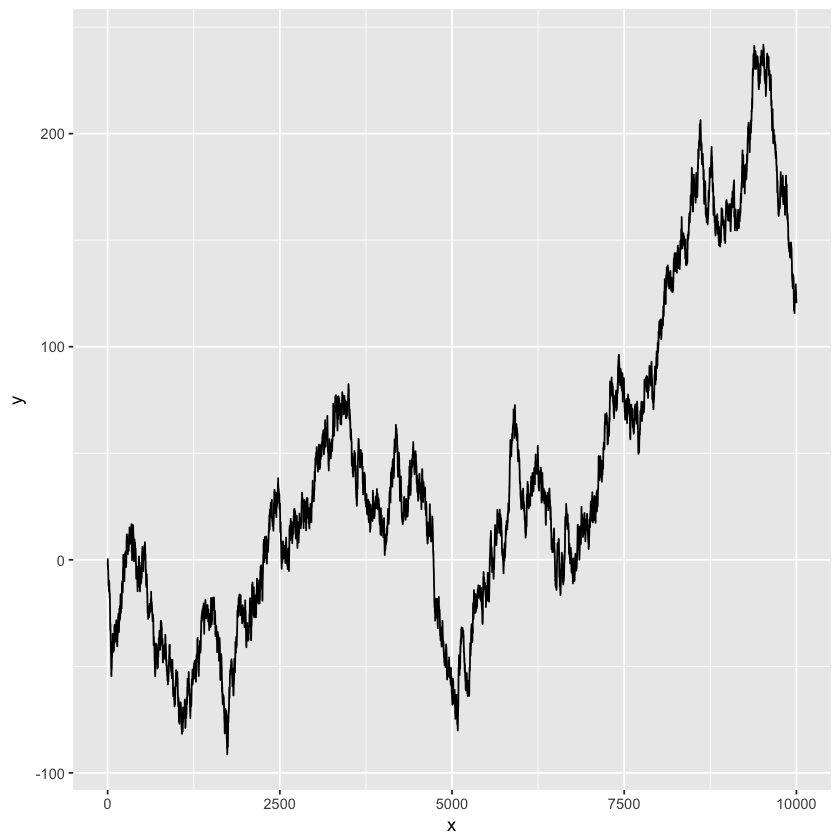

In [7]:
ggplot(data.frame(x = 1:N, y = x), aes(x, y)) + geom_line()

In [8]:
p <- function(x) {
    mu1 <- 3
    mu2 <- 10
    v1 <- 10
    v2 <- 3
    0.3 * exp(-(x - mu1)^2/v1) + 0.7 * exp(-(x - mu2)^2/v2)
}

In [9]:
mh <- function(N) {
    u <- runif(N)
    mu <- 0
    sigma <- 5
    y <- vector(N, mode = "numeric")
    y[1] <- rnorm(1, mean = mu, sd = sigma)
    for (i in 1:N) {
        # 마르코프 체인
        ynew <- y[i] + rnorm(1, mean = mu, sd = sigma)
        alpha <- min(1, p(ynew)/p(y[i]))
        if (u[i] < alpha) {
            y[i + 1] <- ynew
        } else {
            y[i + 1] <- y[i]
        }
    }
    return(y)
}

In [10]:
N <- 5000
real <- data.frame(real_y = p(seq(-10, 20, by = 0.8)), real_x = seq(-10, 20, 
    by = 0.8))

In [12]:
head(real)

real_y,real_x
1.372602e-08,-10.0
1.030581e-07,-9.2
6.808166e-07,-8.4
3.957204e-06,-7.6
2.023751e-05,-6.8
9.106174e-05,-6.0


In [13]:
real$count <- with(real, real_y * N/sum(real_y))

In [14]:
head(real)

real_y,real_x,count
1.372602e-08,-10.0,1.433346e-05
1.030581e-07,-9.2,1.076189e-04
6.808166e-07,-8.4,7.109459e-04
3.957204e-06,-7.6,4.132329e-03
2.023751e-05,-6.8,2.113311e-02
9.106174e-05,-6.0,9.509164e-02


In [15]:
mh_sampling <- data.frame(mh = mh(N))

In [18]:
dim(mh_sampling)

[1] 5001    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


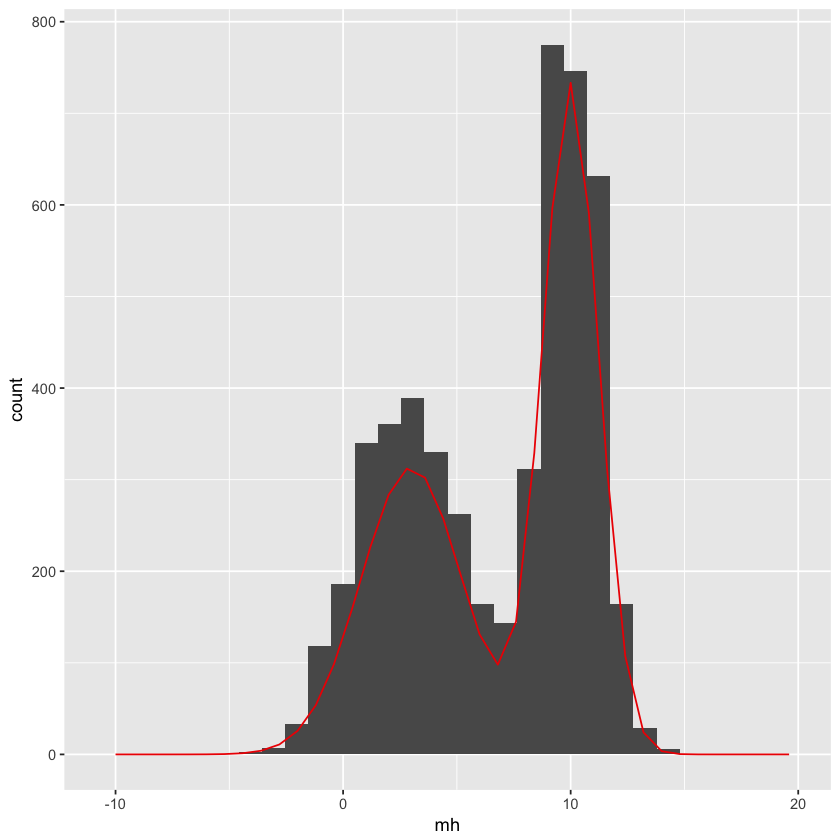

In [21]:
ggplot(mh_sampling, aes(mh)) + geom_histogram() + geom_line(aes(x = real_x, 
    y = count), data = real, colour = "red2") + scale_fill_gradient2(guide = guide_legend(reverse = TRUE))

### Demonstration

![](img/week2_3.png)

- 예를 들어 너의 동생이 동전을 던졌을 때 70%의 확률을 갖는 동전이 있음
    - 사전 확률을 60%의 기울어진 동전이라고 가정할 때 
- 5번 뒤집게 하고 두 번의 앞, 세 번의 뒤를 얻은 사후 확률로 해당 동전이 기울어진 동전인지 알고 싶음
- 두 번 앞이 나왔을 때 사후 확률은 계산해보면 0.388

- 하지만 좀 더 복잡한 문제를 가지고 있다고 가정함. likelihood와 prior를 알 수 있지만 분모 항인 정규화 상수를 얻을 수 없음.
- 대신 시뮬레이션으로 분모 항의 계산 작업을 수행할 수 있나? 이것이 바로 마르코프 체인 몬테 카를로 (특히  Metropolis-Hastings 알고리즘으로)

![](img/week2_4.png)

- 시작점은 어디여도 상관 없음 (앞이든 뒤든) 
- m번의 시뮬레이션을 실행하고 각 반복에서 후보지를 제안하고 그것을 수락하거나 거부할지 판단함.
    - 첫 번째는 새로운 후보를 제안하는 것. (Theta Star라고 부를 것)
    - 수용 가능성 alpha는 무엇이냐? 알파의 일반적인 형식은 수식과 같음.
    - theta star가 기울어진 동전이 되었을 때 알파는 0.635를 가짐.
    - theta star가 평평한 동전이 되었을 때 알파는 1.574를 가짐.

![](img/week2_5.png)

- 쉬운 접근은 theta star가 평평하면 알파는 1보다 크면 항상 평평한 상태로 감
- 그리고 theta star가 기울어진다면 알파는 0.635를 갖고, 63.5% 확률 만큼 기울어진 상태로 감, 그 외는 평평한 상태.
- 다음 2개의 상태를 마르코프 체인으로 끌어낼 수 있음. 
- 사후 확률을 찾고 싶으면 f(thata=loaded and given x=2) 전이 확률을 가지고 마르코브 체인에서 시뮬레이션 할 수 있음. 시간의 일부를 관찰하여 추정치를 계산함
- stationary distribution pi. transition probability P
- Stationary Distribution : t 시점에 따른 확률변수들이 어떠한 결합확률분포(joint distribution)의 결과로 이루어졌다고 볼 때 t 가 변하더라도 이러한 공식이 적용된다면 이는 정성적, 즉 stationary 분포라고 본다. 즉, 시점이 변하더라도 그 때의 확률에 영향을 미치는 요인들이 지속된다면 그것이 Stationary!

![](img/week2_6.png)

- And that when we simulate it, we do get correct estimates then of the posterior probabilities. 

- closed form에서는 사후 확률을 계산할 수 있는 nice한 예.

### Lesson 4.3

#### Random walk with normal likelihood, t prior

- 2 단원의 마지막 단원에서 모델을 상기 해보십시오. 여기서 데이터는 n = 10 회사의 경우 작년에서 올해까지의 총 인력 변화 백분율입니다.

- yi는 회사 i에 대한 인력의 변화율을 나타내며 평균 mu와 분산을 1을 갖는 정규 분포와 동일함.

- mu에 대한 분포는 t분포 (location(위치 모수) 0, scale parameter(척도 모수) 1 and degrees of freedom 1)

![](img/week2_7.png)

- 이 모델은 켤레(conjugate) 분포가 없기 때문에 사후 분포는 쉽게 샘플링 할 수있는 표준 형식이 아닙니다.

- 사후 분포 샘플을 얻기 위해, 우리는 사후 분포가 stationay distribution를 따르는 마르코프 체인을 설정할 필요가 있음.

![](img/week2_8.png)

- Non-conjugate models 강의에서 다음과 같은 사후 분포를 만든 적이 있음

- 왼쪽의 사후 분포는 우리의 목표 분포이고 오른쪽의 식은 우리의 g(μ)입니다.

- R에서 할 수있는 첫 번째 일은 g(μ)를 평가하는 함수를 작성하는 것입니다.

- 사후 분포는 확률과 같이 잠재적으로 작은 많은 수의 결과인 likelihood를 포함하기 때문에 g(u)는 컴퓨터가 사실상 제로로 취급 작은 수치로 평가 될 가능성이 있습니다.

- 이 문제를 해결하기 위해보다 수치적으로 안정된 로그 스케일에서 작업합니다. 따라서 이 g 함수를 계산하는 대신 g의 로그를 계산합니다. 이 함수의 로그를 취하면 여기에서 이 식을 얻을 수 있습니다.

- 따라서 우리는 평가할 함수를 작성합니다.

In [1]:
lg = function(mu, n, ybar) {
  mu2 = mu^2
  n * (ybar * mu - mu2 / 2.0) - log(1 + mu2)
}

![](img/week2_9.png)

In [12]:
mh = function(n, ybar, n_iter, mu_init, cand_sd) {
  ## Random-Walk Metropolis-Hastings algorithm
  
  ## step 1, initialize
  mu_out = numeric(n_iter)
  accpt = 0
  mu_now = mu_init
  lg_now = lg(mu=mu_now, n=n, ybar=ybar)
  
  ## step 2, iterate
  for (i in 1:n_iter) {
    ## step 2a
    mu_cand = rnorm(n=1, mean=mu_now, sd=cand_sd) # draw a candidate
    
    ## step 2b
    lg_cand = lg(mu=mu_cand, n=n, ybar=ybar) # evaluate log of g with the candidate
    lalpha = lg_cand - lg_now # log of acceptance ratio
    alpha = exp(lalpha)
    
    ## step 2c
    u = runif(1) # draw a uniform variable which will be less than alpha with probability min(1, alpha)
    if (u < alpha) { # then accept the candidate
      mu_now = mu_cand
      accpt = accpt + 1 # to keep track of acceptance
      lg_now = lg_cand
    }
    
    ## collect results
    mu_out[i] = mu_now # save this iteration's value of mu
  }
  
  ## return a list of output
  list(mu=mu_out, accpt=accpt/n_iter)
}

In [13]:
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
ybar = mean(y)
n = length(y)
ybar
n

[1] 0.99

[1] 10

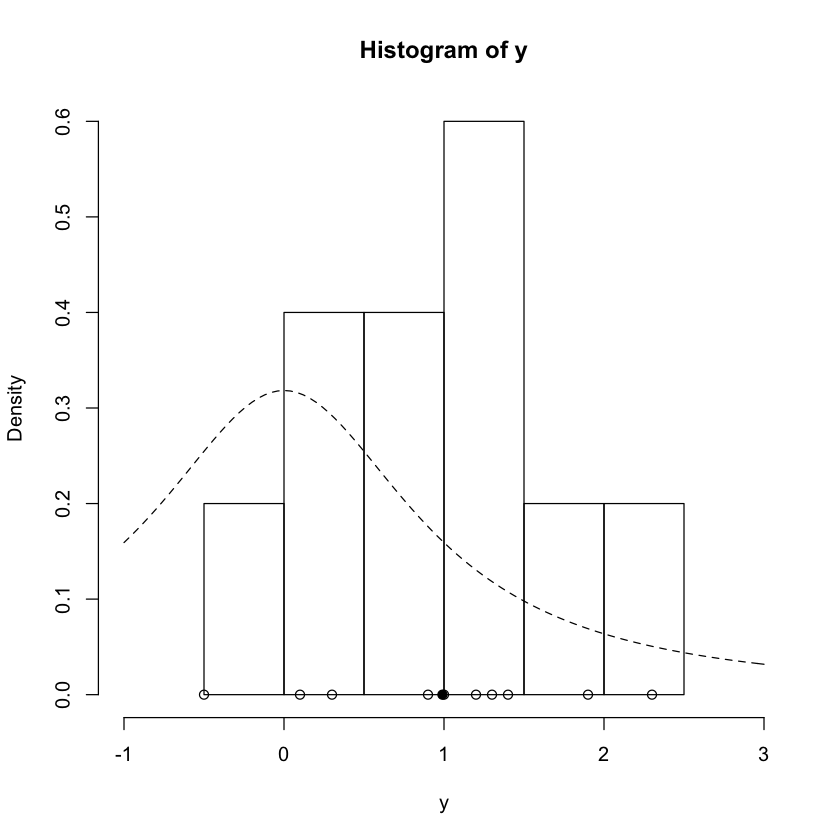

In [14]:
hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu (t distribution)
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

- m로부터의 사후 분포는 평균값이 0과 1 사이의 절충안이 될 것으로 기대됨. (사전 분포는 0, 데이터는 1에 가까움) 이제 우리가 방금 작성한 샘플러를 실행할 준비가 되었습니다. 1000번 반복하기를 원함.

- mu를 0으로 초기화함. 표준 편차를 생성하는 후보를 3으로 설정함. 샘플링을 시작 하기 전에 seed 값 설정

- posterior sample를 post라는 변수의 수집

In [27]:
set.seed(43) # set the random seed for reproducibility
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=3.0)
str(post) #12% accect

List of 2
 $ mu   : num [1:1000] -0.113 1.507 1.507 1.507 1.507 ...
 $ accpt: num 0.122


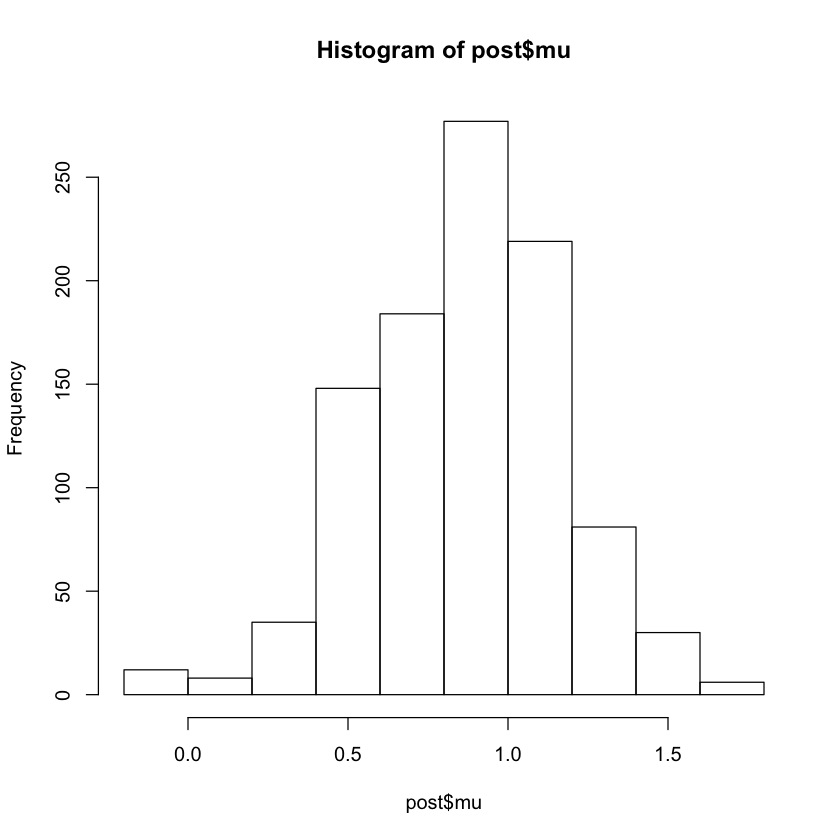

In [25]:
hist(post$mu) 

In [5]:
#install.packages('coda', repos='http://cran.r-project.org')


The downloaded binary packages are in
	/var/folders/b1/6r6n8ptx4r9cq1rvs075k7j00000gn/T//RtmpxcEr3A/downloaded_packages


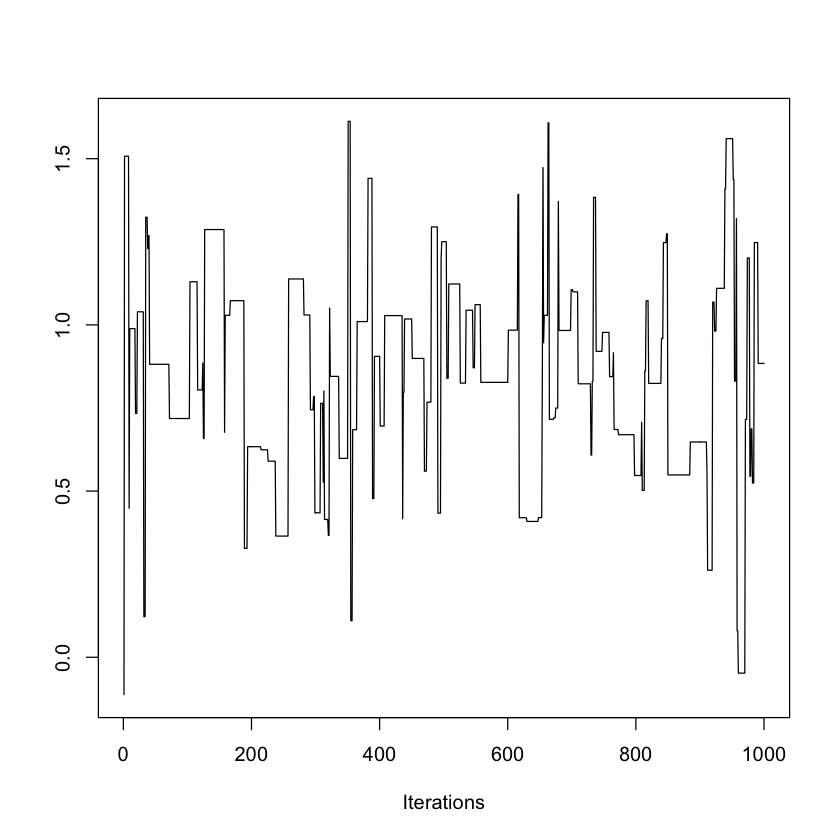

In [26]:
library("coda")
traceplot(as.mcmc(post$mu))

- This last plot is called a trace plot. It shows the history of the chain and provides basic feedback about whether the chain has reached its stationary distribution.

- It appears our proposal step size was too large (acceptance rate below 23%). Let’s try another.

In [28]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.05)
post$accpt

[1] 0.946

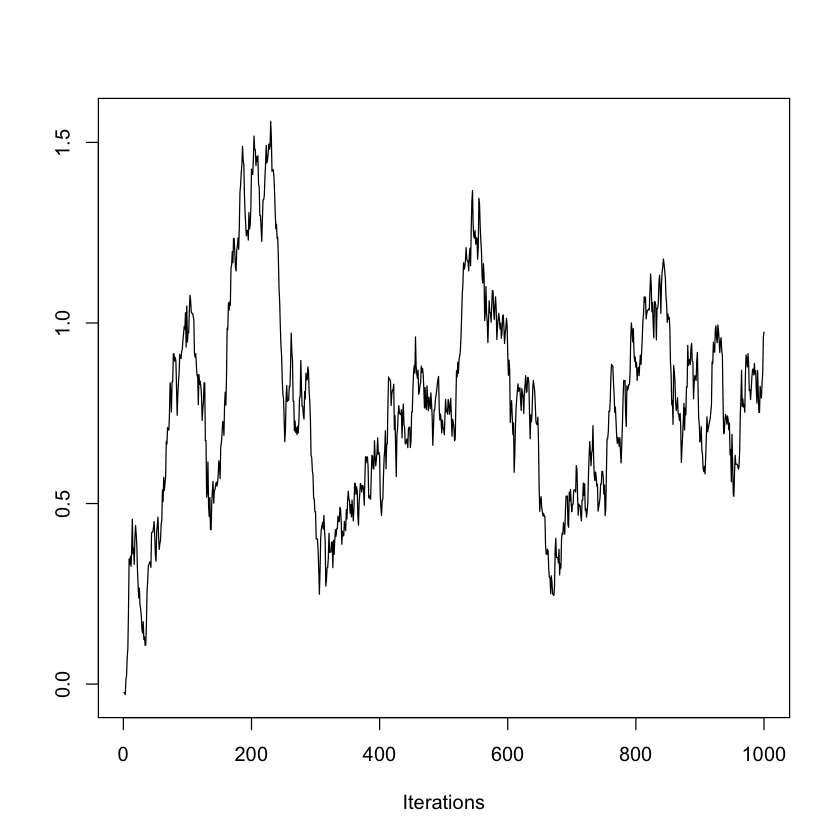

In [14]:
traceplot(as.mcmc(post$mu))

- Oops, the acceptance rate is too high (above 50%). Let’s try something in between.

In [30]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.9)
post$accpt

[1] 0.38

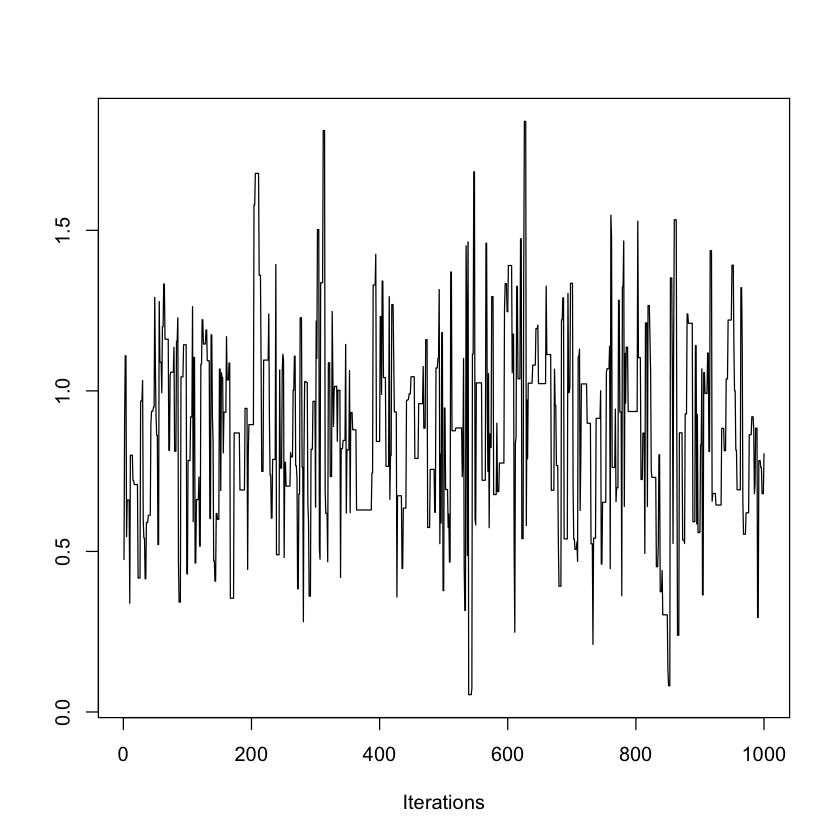

In [31]:
traceplot(as.mcmc(post$mu))

In [32]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=30.0, cand_sd=0.9)
post$accpt

[1] 0.387

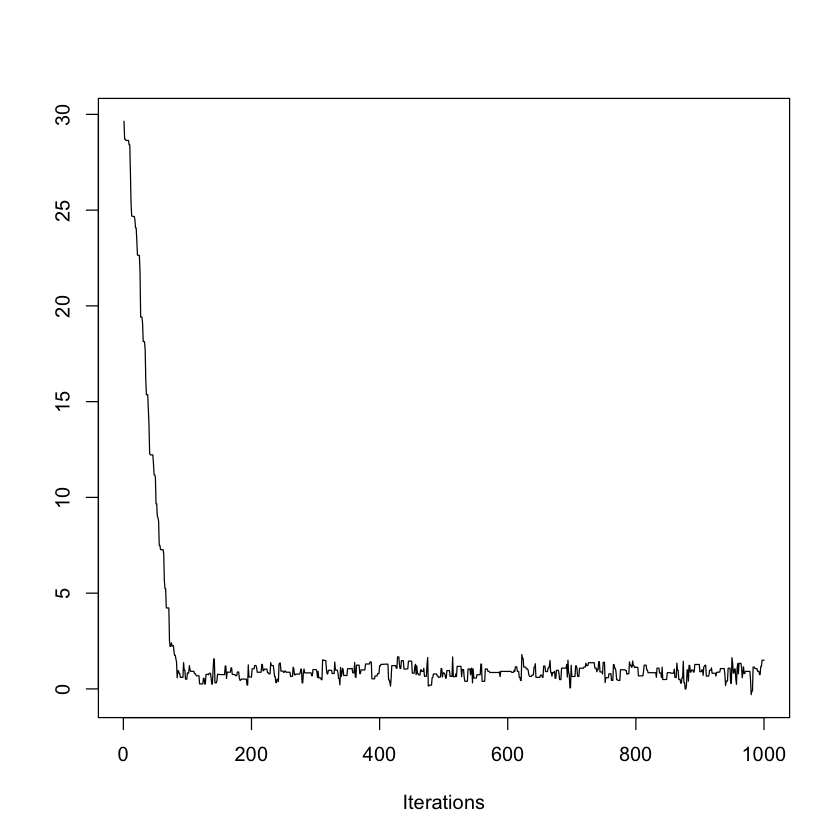

In [33]:
traceplot(as.mcmc(post$mu))

- 고정 된 분포를 찾는 데는 시간이 걸렸지 만 우리가 성공한 것처럼 보입니다! 
- 처음 100 또는 그 이상의 값을 버리면 나머지 샘플은 고정 분포, 우리의 사후 분포에서 나온 것처럼 보입니다! 데이터가 μμ에 대한 우리의 믿음을 어떻게 업데이트했는지 알아보기 위해 이전에 대비하여 후방 밀도를 플로트 해 봅시다.

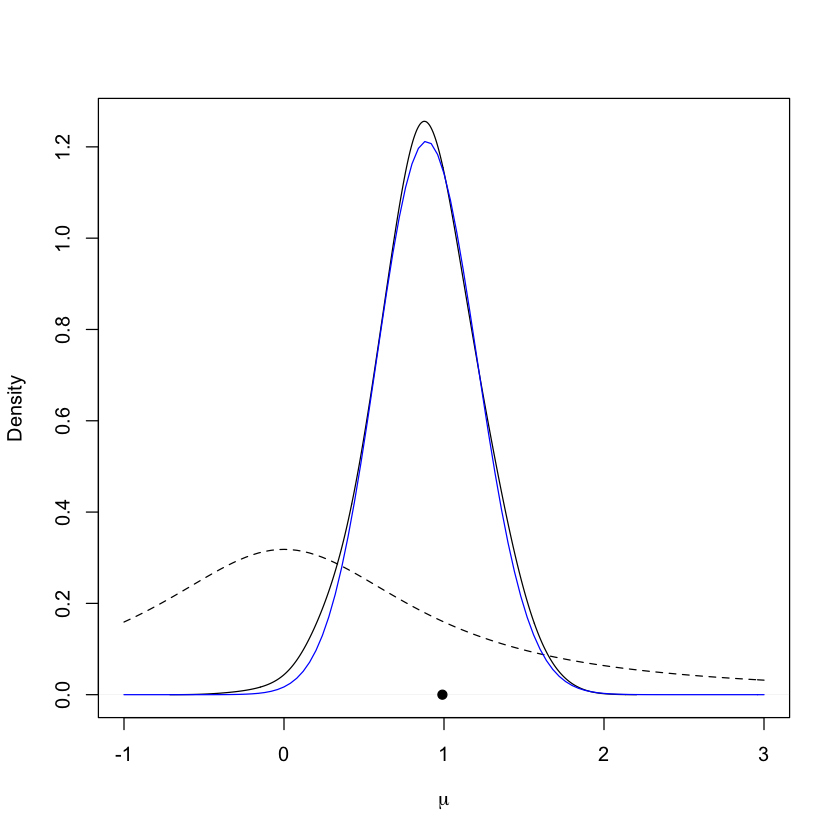

In [36]:
post$mu_keep = post$mu[-c(1:100)] # discard the first 200 samples
plot(density(post$mu_keep, adjust=2.0), main="", xlim=c(-1.0, 3.0), xlab=expression(mu)) # plot density estimate of the posterior
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(ybar, 0, pch=19) # sample mean
curve(0.017*exp(lg(mu=x, n=n, ybar=ybar)), from=-1.0, to=3.0, add=TRUE, col="blue") # approximation to the true posterior in blue

- 이러한 결과는 고무적이지만 예비적인 결과입니다. 
- 우리는 마르코프 사슬이  stationary distribution에 수렴했는지 더 공식적으로 조사 할 필요가 있다. 다음의 수업에서 이것을 탐구 할 것이다.

- Metropolis-Hastings 알고리즘을 사용하여 후방 샘플을 얻는 것은 시간이 오래 걸릴 수 있으며 방금 본 것처럼 미세 조정이 필요합니다. 
- 좋은 소식은 우리가 소프트웨어를 사용하여 대부분의 작업을 수행 할 수 있다는 것입니다. 다음 비디오에서는 후방 샘플링을 쉽게 할 수있는 프로그램을 소개 할 것입니다.

In [23]:
#install.packages('rjags', repos='http://cran.r-project.org')


The downloaded binary packages are in
	/var/folders/b1/6r6n8ptx4r9cq1rvs075k7j00000gn/T//RtmpxcEr3A/downloaded_packages


### Modeling in JAGS

-  이 과정에서 사용할 패키지는 JAGS입니다. Martyn Plummer가 작성한 Just Gibbs Sampler의 약자입니다. 이 프로그램은 무료이며 Mac OS, Windows 및 Linux에서 실행됩니다.

- 이 프로그램은 RJAGS 또는 R2JAGS 패키지의 R을 사용하여 실행할 수 있습니다. 단지 몇 줄의 코드만으로 모델을 지정하고 MCMC 샘플러 실행 가능

- R을 통해 JAGS에서 모델을 구현하는 네 가지 단계가 있습니다. 

- **첫 번째 단계는 모델을 지정하는 것입니다.**
- **두 번째 단계는 모델을 설정하는 것입니다.**
- **세 번째 단계는 MCMC 샘플러를 실행하는 것입니다.**
- **마지막으로 네 번째 단계는 사후 처리입니다.**


- 이전의 예제인 10 개 회사에서 작년부터 올해까지 총 인원의 변화율을 나타내는 데이터가 있는 곳입니다. 

- 이 모델에서, 우리는 고정 된 분산을 가진 정상 확률을 사용했습니다. 그리고 알 수없는 평균에 대한 t 분포. 첫 번째 단계는 모델을 지정하는 것입니다.


### 1. Specify the model
-  모델의 계층 구조를 지정합니다. 이 모델이 어떻게 생겼는지 생각해 봅시다. 
- 우리는 평균 μ와 분산 1을 갖는 독립적인 데이터에 대한 정규 확률을 가지고 있습니다. 우리의 사전에 위치 0, 스케일 1 및 자유도 1을 갖는 t 분포가 있습니다.

- 우리는 mod_string을 호출할 변수를 통해 jag에 모델의 계층적 형식을 작성할 수 있습니다.

In [37]:
library("rjags")
#brew install jags

Linked to JAGS 4.2.0
Loaded modules: basemod,bugs


In [39]:
#encapsulate the model #likelihood for in 1:n
mod_string = " model {
  for (i in 1:n) {
    y[i] ~ dnorm(mu, 1.0/sig2)
  }
  mu ~ dt(0.0, 1.0/1.0, 1.0) # location, inverse scale, degrees of freedom
  sig2 = 1.0
} "

### 2. Set up the model

    - There are multiple ways to specify initial values here. They can be explicitly set, as we did here, or they can be random, i.e., list("mu"=rnorm(1)). Also, we can omit the initial values, and JAGS will provide them.

In [40]:
set.seed(50)
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
n = length(y)

data_jags = list(y=y, n=n)
params = c("mu")

In [41]:
data_jags

$y
 [1]  1.2  1.4 -0.5  0.3  0.9  2.3  1.0  0.1  1.3  1.9

$n
[1] 10

In [42]:
params

[1] "mu"

In [43]:
inits = function() {
  inits = list("mu"=0.0)
} # optional (and fixed)

In [44]:
mod = jags.model(textConnection(mod_string), data=data_jags, inits=inits)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 1
   Total graph size: 28

Initializing model



In [46]:
str(mod)

List of 8
 $ ptr      :function ()  
 $ data     :function ()  
 $ model    :function ()  
 $ state    :function (internal = FALSE)  
 $ nchain   :function ()  
 $ iter     :function ()  
 $ sync     :function ()  
 $ recompile:function ()  
 - attr(*, "class")= chr "jags"


### 3. Run the MCMC sampler

In [47]:
update(mod, 500) # burn-in

mod_sim = coda.samples(model=mod,
                       variable.names=params,
                       n.iter=1000)

### 4. Post processing
- 네 번째이자 마지막 단계는 사후 처리입니다. 
- 여기서 많은 세부 사항을 다루지는 않겠지만 나중에 과정에서 많은 후 처리 작업을 수행 할 것입니다.

In [48]:
summary(mod_sim)


Iterations = 1501:2500
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
       0.89443        0.32519        0.01028        0.01307 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.3052 0.6624 0.8852 1.1071 1.5696 


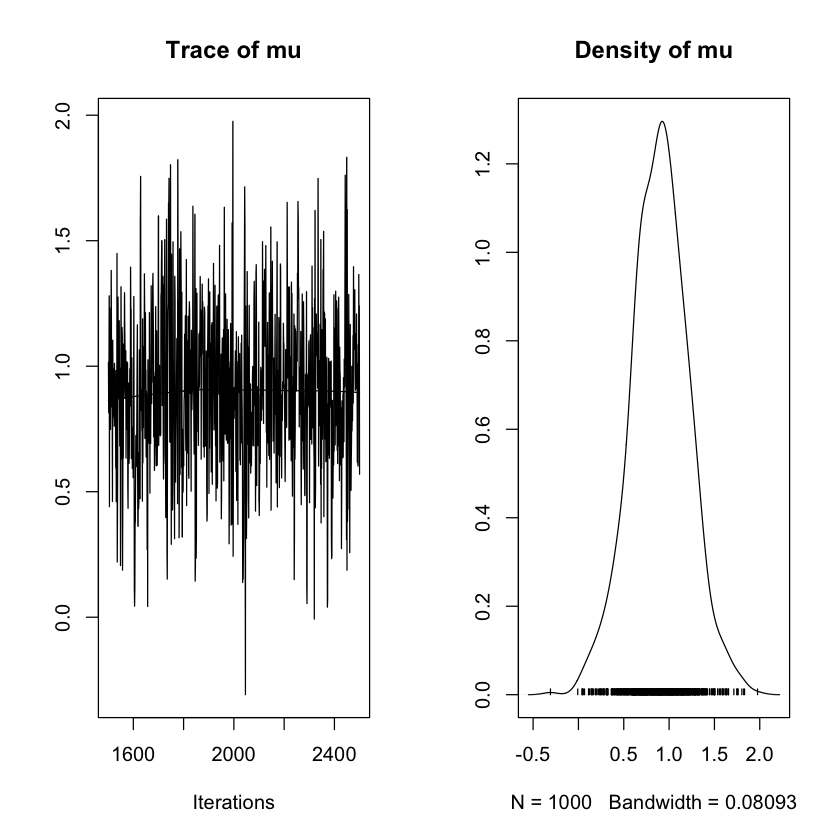

In [38]:
plot(mod_sim)

## MCMCsoftware

### Jags

1. JAGS는 여러 플랫폼에서 사용 가능하며 유사합니다.
2. JAGS는 모델 작성을 위해 인기있는 버그 구문을 사용합니다.
3. JAGS는 R에서 쉽게 호출하여 실행할 수 있습니다.
4. JAGS는 빠르며이 코스에서 사용하는 초등 모델과 잘 작동합니다.


### BUGS

- BUGS "Bayesian inference Using Gibbs Sampling"의 약자이며 WinBUGS와 오픈 소스 OpenBUGS의 두 개척 패키지를 포함합니다. 

- 이 프로그램은 모델을 계층 적 표현으로 지정하기 위해 인기있는 BUGS 구문을 도입했습니다. 
- WinBUGS는 Windows에서만 실행되며 OpenBUGS는 Linux로 확장됩니다. 둘 다 그래픽 사용자 인터페이스가 있으며 R에서 호출하여 실행할 수 있습니다. 사용자 관점에서 볼 때 JAGS는 버그와 매우 유사합니다.

- 자세한 내용은 http://www.mrc-bsu.cam.ac.uk/software/bugs/를 참조하십시오.


### STAN
- STAN은 새롭고 빠르게 성장하는 오픈 소스 소프트웨어로, 복잡한 계층 적 모델에서 더 나은 MCMC 믹싱 및 컨버전스를 달성합니다. 

- STAN은 Hamiltonian Monte Carlo와 같은보다 정교한 MCMC 알고리즘을 사용합니다. BUGS와 유사한 모델 작성 문법을 사용하지만 약간 더 많은 오버 헤드 코드가 필요합니다. Linux, Mac 및 Windows에서 실행되며 R에서 호출하고 실행할 수 있습니다.

- 자세한 내용은 다음을 참조하십시오. http://mc-stan.org/


### NIMBLE
- NIMBLE은 BUGS 모델링 프레임 워크를 기반으로 한 또 다른 새로운 소프트웨어입니다. 

- NIMBLE은 사용자가 다양한 알고리즘 중에서 선택하고 심지어 자신의 알고리즘 / 샘플러를 작성할 수 있도록 유연성을 목표로합니다. Windows 및 Mac에서 R을 통해 작동합니다.

- 자세한 내용은 다음을 참조하십시오. http://r-nimble.org/


### PyMC
- PyMC는 파이썬에서 직접 베이지안 모델링을 용이하게하는 파이썬 모듈입니다.
- 앞에서 나열한 BUGS 기반 프로그램과 근본적으로 다르며 모델 사양에 대해 다른 구문을 사용합니다. - PyMC는 STAN과 마찬가지로 복잡한 모델에서 향상된 혼합 및 수렴을 위해 정교한 MCMC 알고리즘을 사용합니다.

- 자세한 내용은 다음을 참조하십시오.
https://pymc-devs.github.io/pymc/
https://pymc-devs.github.io/pymc3/


### Proc MCMC
- Proc MCMC는 상용 SAS 통계에서 독점적으로 작동하는 절차입니다 소프트웨어. 모델 사양 구문은 독특하지만 SAS, 특히 SAS를 배우기 쉽습니다.
- 자세한 내용은 다음을 참조하십시오.
http://www.sas.com/en_us/software/analytics/stat.html


## 5. Gibbs Sampling

- 지금까지 단 하나의 매개 변수만으로 MCMC를 시연했음
- 여러 매개 변수의 사후 분포를 찾고 그 사후 분포에 표준 형식이 없는 경우에는 어떻게 됩니까?

### 해결 방법
- 1. 하나의 옵션은 모든 매개 변수에 대한 후보를 한 번에 샘플링하여 Metropolis Hastings을 수행하는 것. 모든 후보자를 함께 수락하거나 거부하거나 이것이 가능할 수도 있지만 매우 복잡함.

- 2. 또 다른 간단한 옵션은 한 번에 하나씩 매개 변수를 샘플링 하는 것. 

![](img/week2_10.png)

-  간단한 예를 들어 우리의 데이터 Y가 주어지면 두 개의 매개 변수 인 theta와 phi에 대한 joint postilion distribution이 proportionality가 있다고 가정


- 깁스 샘플링은 제안 분포를 통해서 사후 분포를 찾는 것이 아니라, 조건부 사후 분포(conditional posterior distiribution)를 토대로 사후 분포를 찾는다. 

- 결합 사후 분포 p(θ1,θ2,θ3|D)p(θ1,θ2,θ3|D)에서 직접 샘플을 추출하기 어렵기 때문에 모든 조건부 사후 확률 분포 p(θ1|θ2,θ3,D)p(θ1|θ2,θ3,D), p(θ2|θ1,θ3,D)p(θ2|θ1,θ3,D), p(θ3|θ1,θ2,D)p(θ3|θ1,θ2,D)에서 샘플을 추출하여, 이를 토대로 사후 분포를 계산한다.

- 메트로폴리스 알고리즘과의 차이점은, 조건부 확률일지라도 직접 사후 분포에서 샘플을 추출한다는 점이다. 따라서 메트로폴리스 알고리즘처럼 제안을 거절할 필요가 없다. 

- 조건부 확률이라는 제약이 있더라도 사후 확률 분포의 일부에서 샘플을 추출하므로 모든 샘플 지점을 수용할 수 있다. 다만, 모든 조건부 사후 확률 분포를 구할 수 있고, 여기서 샘플을 직접 추출할 수 있다는 제약 사항을 만족해야만 깁스 샘플링을 사용할 수 있다

![](img/week2_11.png)

- 특정 매개 변수에 대한 업데이트를 수행하기 위해 다른 모든 매개 변수의 현재 값으로 대체합니다. 
- 여기에서와 같이 두 매개 변수 인 phi와 theta에 대한 joint posterior distribution를 가지고 있다고 가정 해 봅시다.

- 모든 다른 매개 변수와 데이터, 전체 조건부 분포가 주어지면 각 매개 변수에 대한 분포를 찾을 수 있습니다.

- Gibbs 샘플러의 첫 번째 단계는 우리가 초기화하는 Metropolis Hastings의 첫 단계와 같습니다.

- 다음 단계는 1에서 M까지 반복하기 때문에 다음을 반복 할 것입니다.

- 다음 부분에서는 완전한 조건부 분포를 찾고 깁스 샘플러를 만드는 구체적인 예를 제공 할 것입니다.

### 5-2 Conditionally conjugate prior example with Normal Likelihood

-  우리가 알 수 없는 평균과 알려지지 않은 분산이있는 정상적인 확률을 갖는 예제로 돌아가겠습니다

![](img/week2_13.png)

-  μ가 알려진 경우, 역 감마는 σ 제곱에 앞서 Conjugate prior이다. 이것은 Gibbs sampler에서 편리하고 완벽한 조건부 분포를 제공합니다.

![](img/week2_15.png) 

- 우리가 필요로 하는 두 가지 완전한 조건부 분포를 찾는 것이 쉽습니다.
- 우리가 살펴볼 첫 번째 것은 μ입니다. 시그마 제곱이 알려진 상수라고 가정합니다
- 어떤 경우에는 상수가되어 정규화 상수로 흡수됩니다. 그래서 mu의 완전한 조건부 분포, 시그마 제곱, 일정한 숫자인 척하면서 모든 데이터를 처리 할 것입니다.

![](img/week2_16.png)

- 이제 시그마 제곱을 살펴보고 mu가 알려져 있다고 가정하겠습니다. 그래서 우리는 Σ 제곱에서 전체 조건부 분포를 살펴볼 것입니다. mu와 모든 데이터가 주어집니다.

- 그래서 우리는 시그마 제곱을 포함하는이 표현에서 조각들을 취할 것입니다, 그리고 이제 mu는 상수로 생각됩니다.

- 이 부분은 뮤에 대한 하이퍼 파라미터를 포함하고 있지만 실제 시그마 제곱 파라미터는 관찰되지 않습니다. 그래서 우리는 그걸 건너 뜁니다. 그것은 정규화 상수로 흡수됩니다.

- 이 두 분포는 마르코프 체인에서 시뮬레이션 할 깁스 샘플러의 기초를 제공합니다. 마르코프 체인의 고정 분포는 mu 및 σ 제곱에 대한 전체 사후 분포입니다. 가장 최근에 한 매개 변수를 사용하여 다른 매개 변수를 업데이트하기 위해이 두 매개 변수 사이를 간단히 대체합니다

### 5-3 Computing example with Normal Likelihood

-  올해까지 총 10 명에 이르는 데이터 또는 백분율 변화가있는 실행 예제로 돌아가 보겠습니다. 우리는 여전히 정상적인 가능성을 사용할 것입니다. 

- 지금까지 우리는 분산, 회사 간 성장의 분산, 시그마 제곱을 1로 고정 시켰습니다. 이제 우리는 그 가정을 풀 것입니다. 우리는 시그마 제곱을 알고 있다고 가정하지 않을 것입니다. 우리는 mu와 마찬가지로 평균을 구합니다.

- 이전의 t 대신에, 우리는 조건부 공액 사전을 사용하려고합니다. 평균은 공분산을 의미하며, 평균은 μ, 역 감마는 분산, 시그마 제곱입니다.

![](img/week2_17.png)

- 첫 번째 단계는 이전 세그먼트에서 파생 된 전체 조건부 분포로부터 시뮬레이트하는 함수를 R로 작성하는 것입니다.

- 다음은 평균 mu에 대한 전체 조건부 업데이트입니다. 여기에는 σ 제곱의 분산에 대한 전체 조건부 업데이트가 있습니다. R에서 시뮬레이션 할 함수를 작성해야합니다. 첫 번째는 update_mu이고 두 번째 것은 update_sig2입니다.

- Notice that the only difference between p(θ,ϕ∣y)p(θ,ϕ∣y) and p(θ∣ϕ,y)p(θ∣ϕ,y) is multiplication by a factor that doesn’t involve θθ.


### 첫 번째 단계

- The first step will be to write functions to simulate from the full conditional distributions we derived in the previous segment.

- The full conditional for μ, given σ2 and data is

In [49]:
update_mu = function(n, ybar, sig2, mu_0, sig2_0) {
  sig2_1 = 1.0 / (n / sig2 + 1.0 / sig2_0)
  mu_1 = sig2_1 * (n * ybar / sig2 + mu_0 / sig2_0)
  rnorm(n=1, mean=mu_1, sd=sqrt(sig2_1))
}

- The full conditional for σ2 given μ and data is

In [52]:
update_sig2 = function(n, y, mu, nu_0, beta_0) {
  nu_1 = nu_0 + n / 2.0
  sumsq = sum( (y - mu)^2 ) # vectorized
  beta_1 = beta_0 + sumsq / 2.0
  out_gamma = rgamma(n=1, shape=nu_1, rate=beta_1) # rate for gamma is shape for inv-gamma
  1.0 / out_gamma # reciprocal of a gamma random variable is distributed inv-gamma
}

- With functions for drawing from the full conditionals, we are ready to write a function to perform Gibbs sampling.

In [53]:
gibbs = function(y, n_iter, init, prior) {
  ybar = mean(y)
  n = length(y)
  
  ## initialize
  mu_out = numeric(n_iter)
  sig2_out = numeric(n_iter)
  
  mu_now = init$mu
  
  ## Gibbs sampler
  for (i in 1:n_iter) {
    sig2_now = update_sig2(n=n, y=y, mu=mu_now, nu_0=prior$nu_0, beta_0=prior$beta_0)
    mu_now = update_mu(n=n, ybar=ybar, sig2=sig2_now, mu_0=prior$mu_0, sig2_0=prior$sig2_0)
    
    sig2_out[i] = sig2_now
    mu_out[i] = mu_now
  }
  
  cbind(mu=mu_out, sig2=sig2_out)
}

In [54]:
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
ybar = mean(y)
n = length(y)

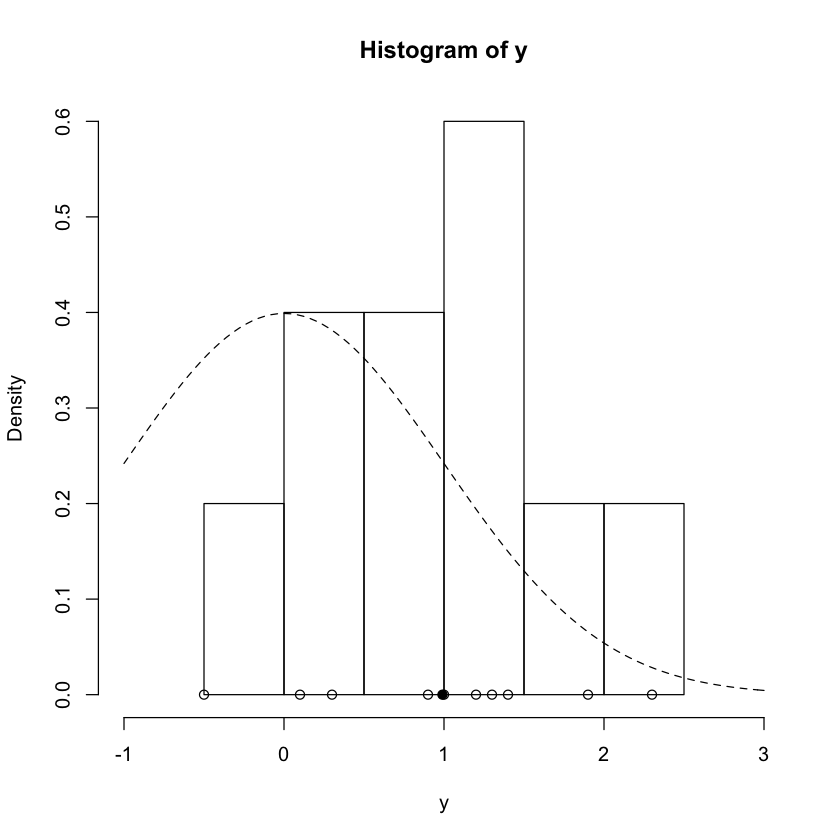

In [55]:
#hyper parameter

## prior
prior = list()
prior$mu_0 = 0.0
prior$sig2_0 = 1.0
prior$n_0 = 2.0 # prior effective sample size for sig2
prior$s2_0 = 1.0 # prior point estimate for sig2
prior$nu_0 = prior$n_0 / 2.0 # prior parameter for inverse-gamma
prior$beta_0 = prior$n_0 * prior$s2_0 / 2.0 # prior parameter for inverse-gamma

hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dnorm(x=x, mean=prior$mu_0, sd=sqrt(prior$sig2_0)), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [56]:
set.seed(53)

init = list()
init$mu = 0.0

post = gibbs(y=y, n_iter=1e3, init=init, prior=prior)

In [57]:
head(post)

mu,sig2
0.3746992,1.5179144
0.4900277,0.8532821
0.2536817,1.4325174
1.1378504,1.2337821
1.0016641,0.8409815
1.1576873,0.7926196


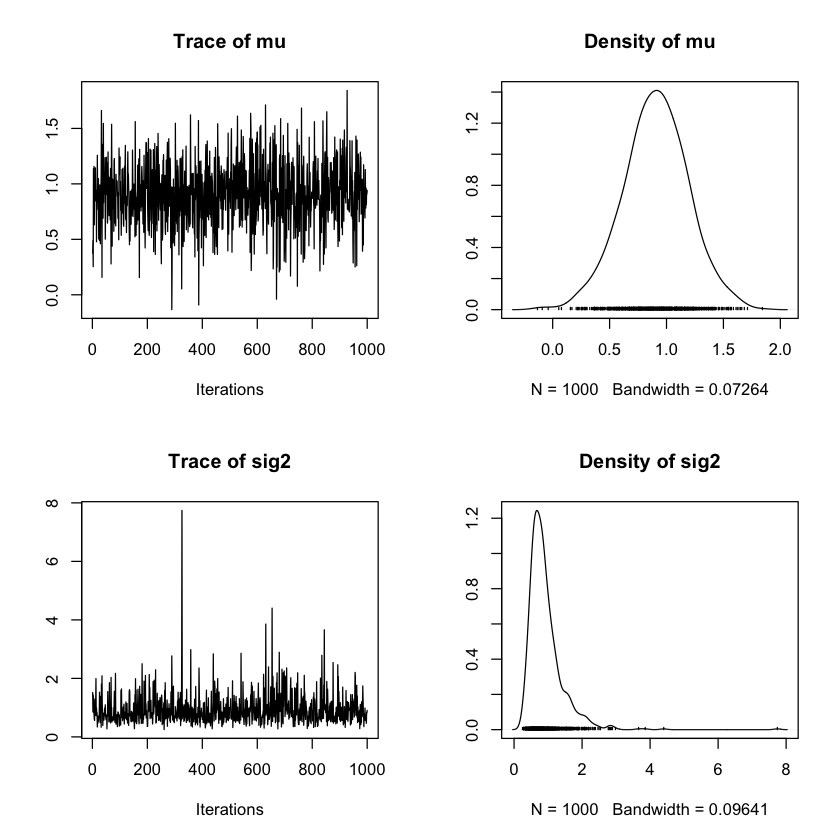

In [58]:
plot(as.mcmc(post))

In [59]:
summary(as.mcmc(post))


Iterations = 1:1000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

       Mean     SD Naive SE Time-series SE
mu   0.9051 0.2868  0.00907        0.00907
sig2 0.9282 0.5177  0.01637        0.01810

2. Quantiles for each variable:

       2.5%    25%    50%   75% 97.5%
mu   0.3024 0.7244 0.9089 1.090 1.481
sig2 0.3577 0.6084 0.8188 1.094 2.141


- 메트로폴리스 헤이스팅스의 예에서와 같이, 이러한 사슬은 수렴 한 것처럼 보입니다. 다음 단원에서는 컨버전스에 대해 자세히 설명합니다.

### 6. Assessing Convergence

#### Trace plots, autocorrelation
- 지난 두 번의 수업에서  stationary distribution가 목표 분포 인 마르코프 체인을 시뮬레이션 할 수있는 방법을 보여주었습니다. 보통 우리의 목표 분포는 우리가 추정하고자 하는 파라미터의 사후 분포입니다.

- 시뮬레이션 된 체인을 사용하여 몬테카를로 추정치를 얻으려면 먼저 다음 질문을 스스로해야합니다. 시뮬레이션 된 마르코프 체인이 아직 stationary distribution로 수렴 했습니까?

- 불행히도 이것은 대답하기 어려운 질문입니다. 그러나 우리는 조사 할 몇 가지 일을 할 수 있습니다.  이 단원에서는 코드에 초점을 맞추지 않고 플롯에 중점을 둘 것입니다.

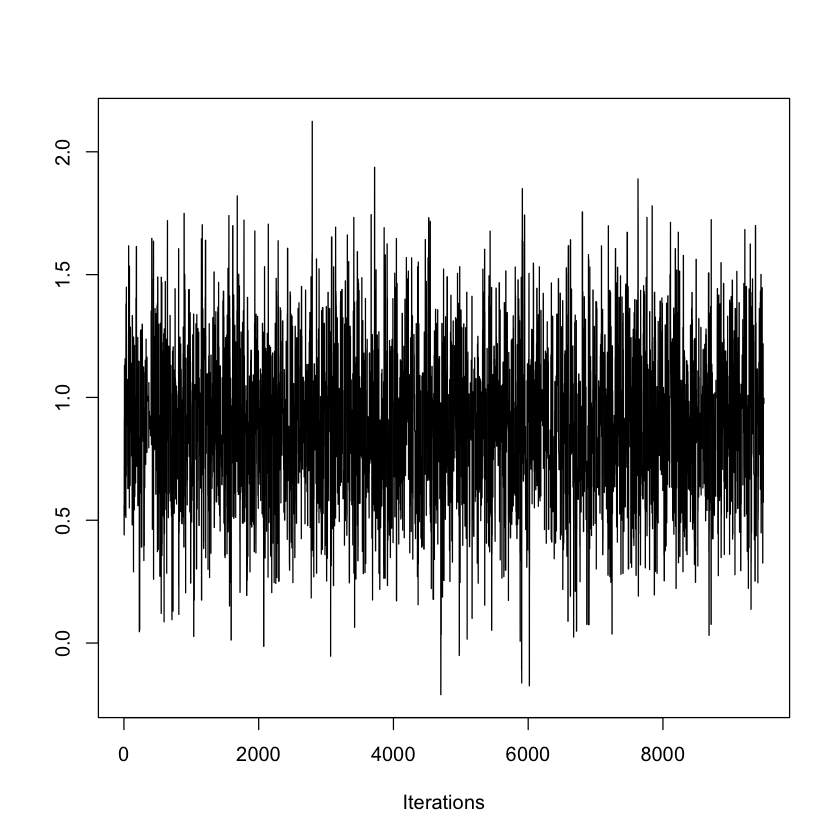

In [61]:
set.seed(61)
post0 = mh(n=n, ybar=ybar, n_iter=10e3, mu_init=0.0, cand_sd=0.9)
coda::traceplot(as.mcmc(post0$mu[-c(1:500)]))

- 체인이 stationary되어 있으면 장기적인 경향이 없어야합니다. 체인의 평균값은 대략 평평해야합니다.

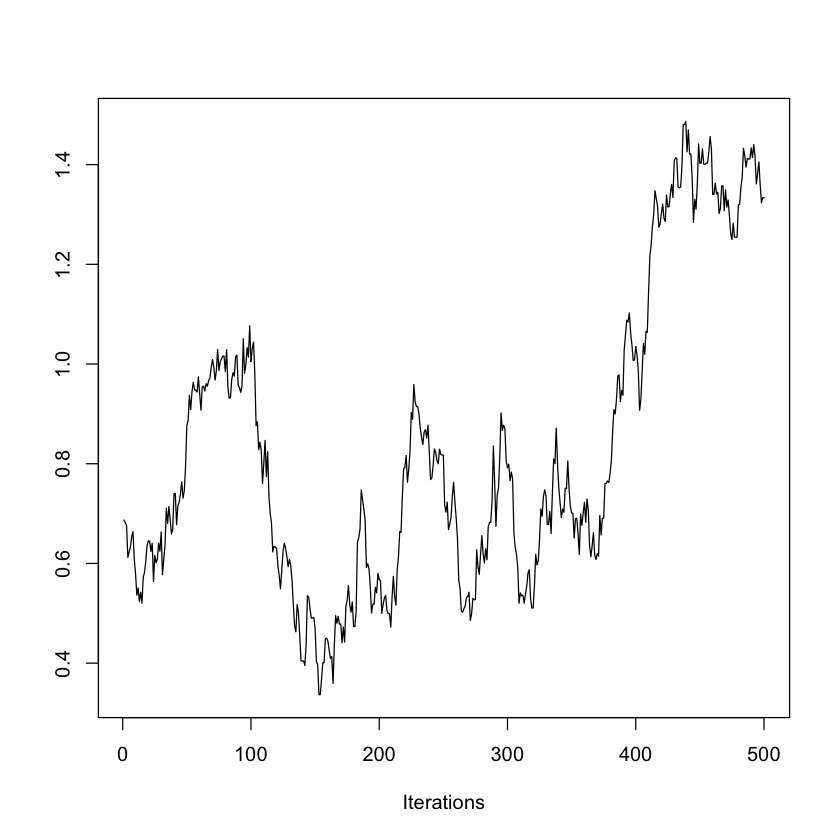

In [62]:
set.seed(61)
post1 = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.04)
coda::traceplot(as.mcmc(post1$mu[-c(1:500)]))

- 이 경우 다음과 같이 체인을 더 많은 반복 실행해야합니다.

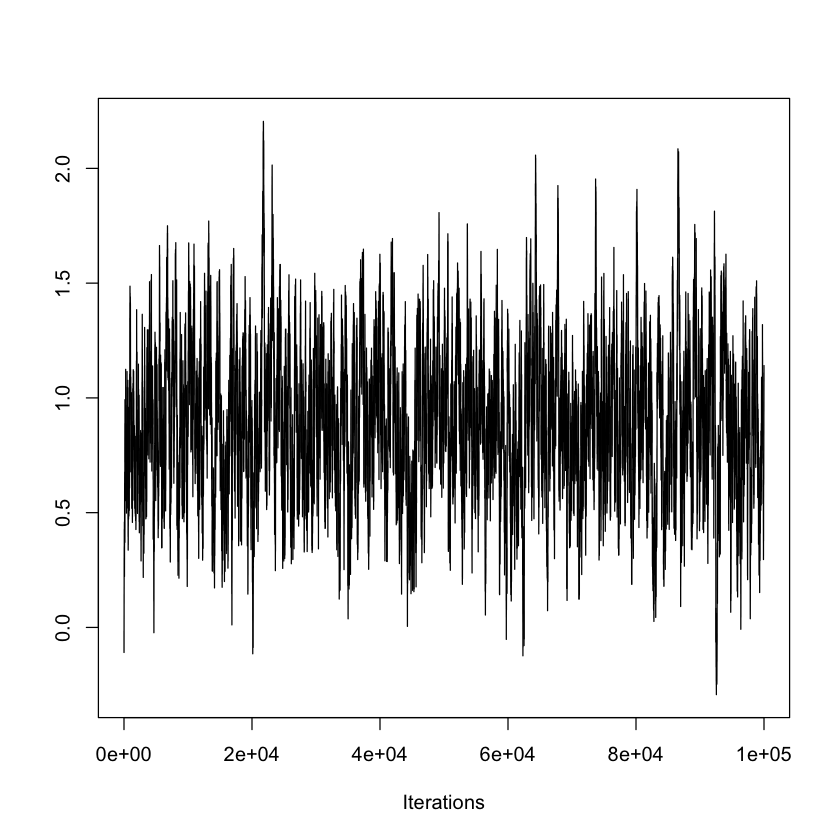

In [63]:
set.seed(61)
post2 = mh(n=n, ybar=ybar, n_iter=100e3, mu_init=0.0, cand_sd=0.04)
coda::traceplot(as.mcmc(post2$mu))

- 체인은 훨씬 더 큰 시간 규모로 수렴 한 것처럼 보입니다.

#### Monte Carlo effective sample size

- 우리가 살펴본 두 사슬 간의 주요 차이점은 각각의 자기 상관의 수준입니다. 
- 자기 상관은 -1-1과 + 1 + 1 사이의 숫자이며 체인의 현재 값이 과거 값 (래그)에 얼마나 선형 적으로 종속되는지 측정합니다. 우리는 자기 상관 그래프로 이것을 볼 수 있습니다 :

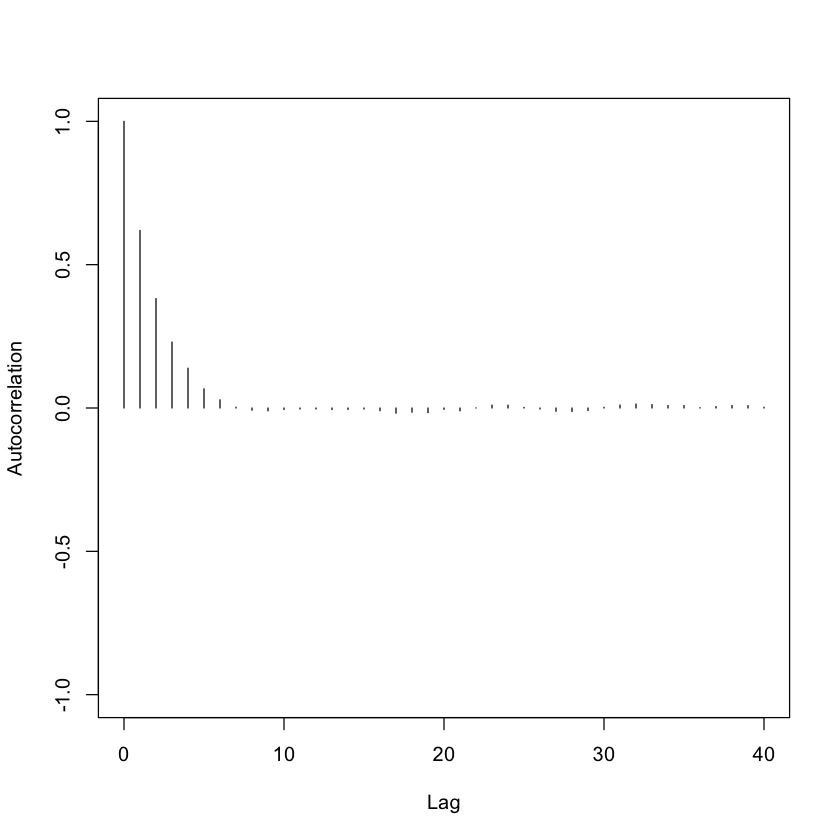

In [64]:
coda::autocorr.plot(as.mcmc(post0$mu))

In [65]:
coda::autocorr.diag(as.mcmc(post0$mu))

Lag 0,1.000000000
Lag 1,0.619203037
Lag 5,0.066753798
Lag 10,-0.005058642
Lag 50,-0.013328787


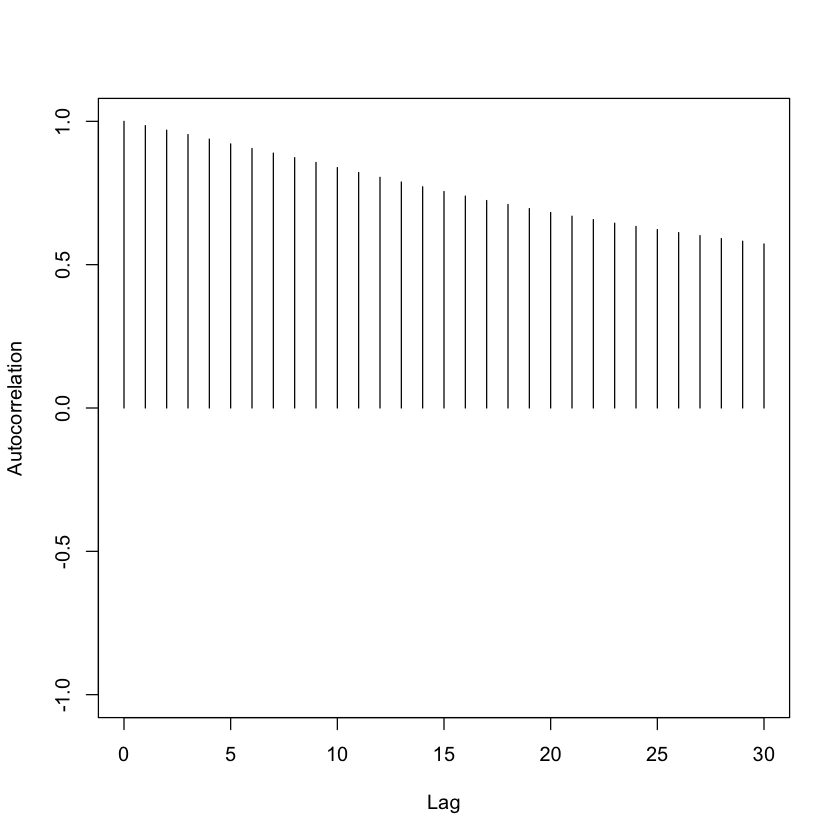

In [66]:
coda::autocorr.plot(as.mcmc(post1$mu))

In [67]:
coda::autocorr.diag(as.mcmc(post1$mu))

Lag 0,1.0000000
Lag 1,0.9850078
Lag 5,0.9213126
Lag 10,0.8387333
Lag 50,0.3834563


- 자기 상관은 우리의 마르코프 체인에서 얼마나 많은 정보를 얻을 수 있는지 알려주기 때문에 중요합니다.

- 상관성이 높은 마르코프 사슬에서 1000 번의 샘플링을 샘플링하면 정적 분포에서 독립적으로 추출 된 1000 개의 샘플에서 얻을 수있는 것보다 정적 분포에 대한 정보가 더 적습니다.

- 자기 상관은 체인의 몬테카를로 유효 표본 크기를 계산하는 주요 구성 요소입니다. 

- 몬테카를로 유효 샘플 크기는 마르코프 체인에서 동등한 정보를 얻기 위해 고정 분포의 독립 샘플을 몇 개나 그리어야 하는지를 나타냅니다. 본질적으로 몬테카를로 추정에 대한 강의에서 선택한 m (표본 크기)입니다.

In [68]:
str(post2) # contains 100,000 iterations

List of 2
 $ mu   : num [1:100000] -0.0152 -0.1007 -0.0867 -0.1092 -0.0811 ...
 $ accpt: num 0.958


In [69]:
coda::effectiveSize(as.mcmc(post2$mu)) # effective sample size of ~350

var1 
373.858

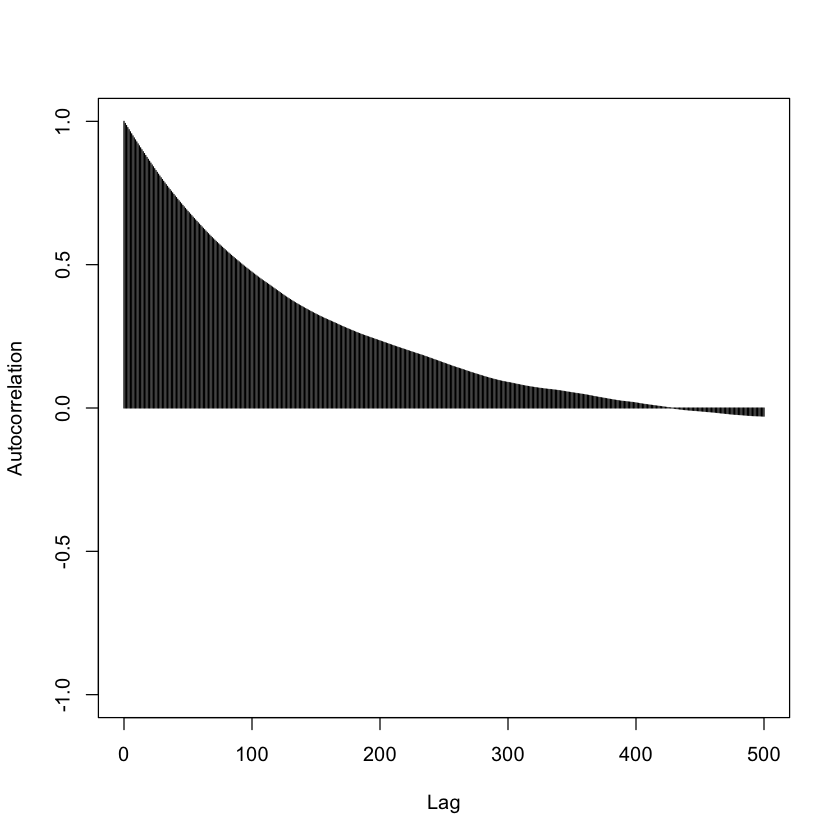

In [70]:
## thin out the samples until autocorrelation is essentially 0. This will leave you with approximately independent samples. The number of samples remaining is similar to the effective sample size.
coda::autocorr.plot(as.mcmc(post2$mu), lag.max=500)

In [104]:
thin_interval = 400 # how far apart the iterations are for autocorrelation to be essentially 0.
thin_indx = seq(from=thin_interval, to=length(post2$mu), by=thin_interval)
head(thin_indx)

[1] 400

- 이 그래프는 자동 상관 관계가 0으로 떨어지기 전에 약 400 개의 래그 또는 400 개의 래그까지 진행해야한다는 것을 보여줍니다. 

- 즉, 체인의 값은 체인에서 서로 400 단계 정도 떨어져 있어야합니다 더 이상 자기 상관되지 않습니다. 400 회 반복 당 1 회로 만 유지한다면 어떻게됩니까?

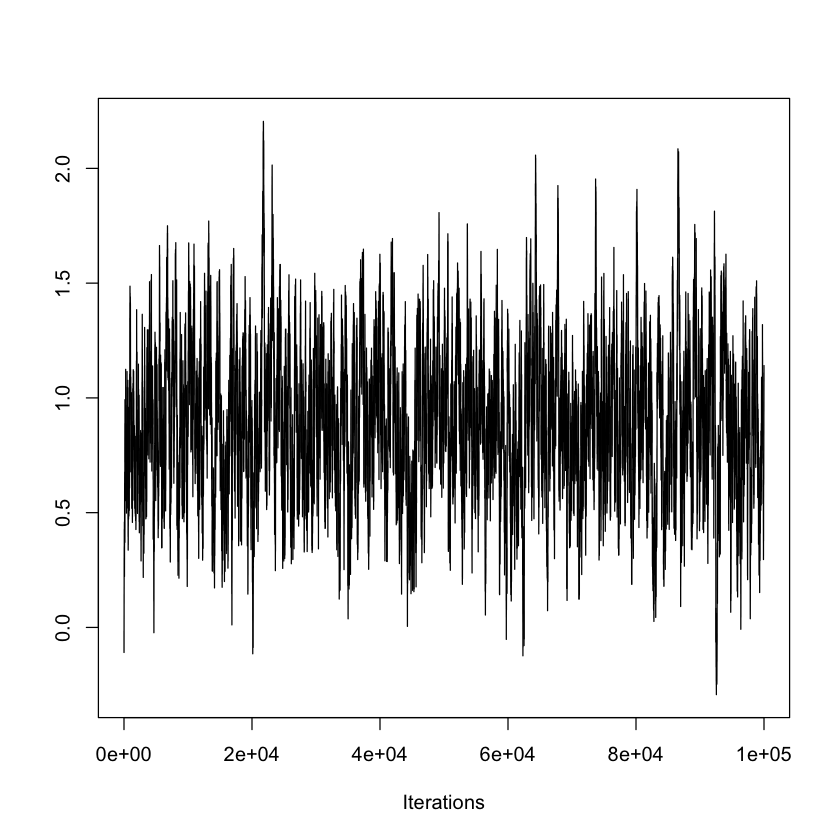

In [72]:
post2mu_thin = post2$mu[thin_indx]
traceplot(as.mcmc(post2$mu))

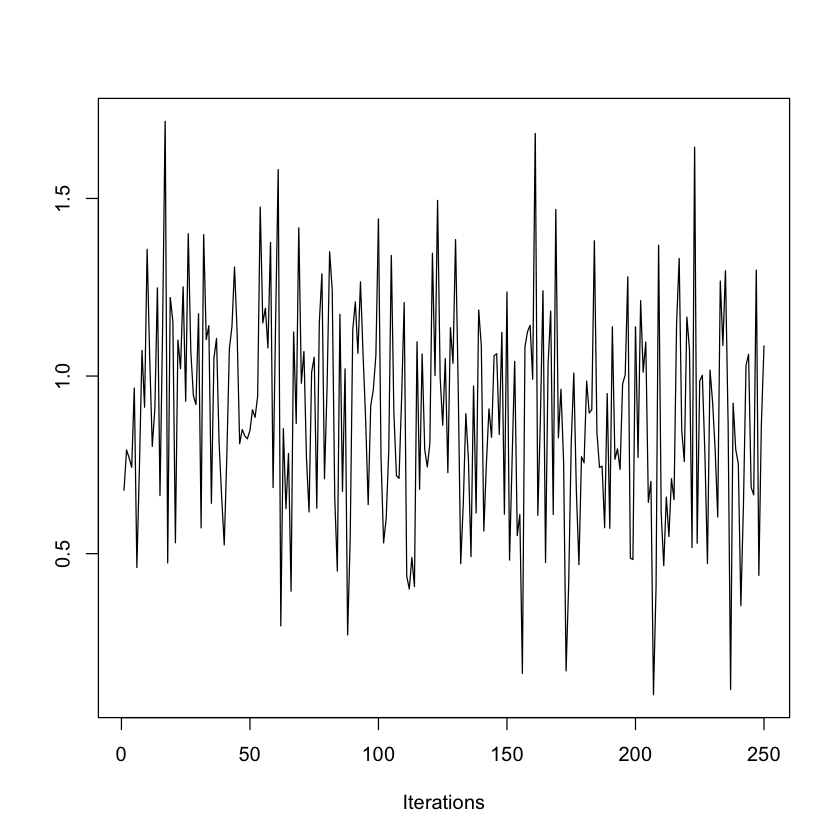

In [73]:
traceplot(as.mcmc(post2mu_thin))

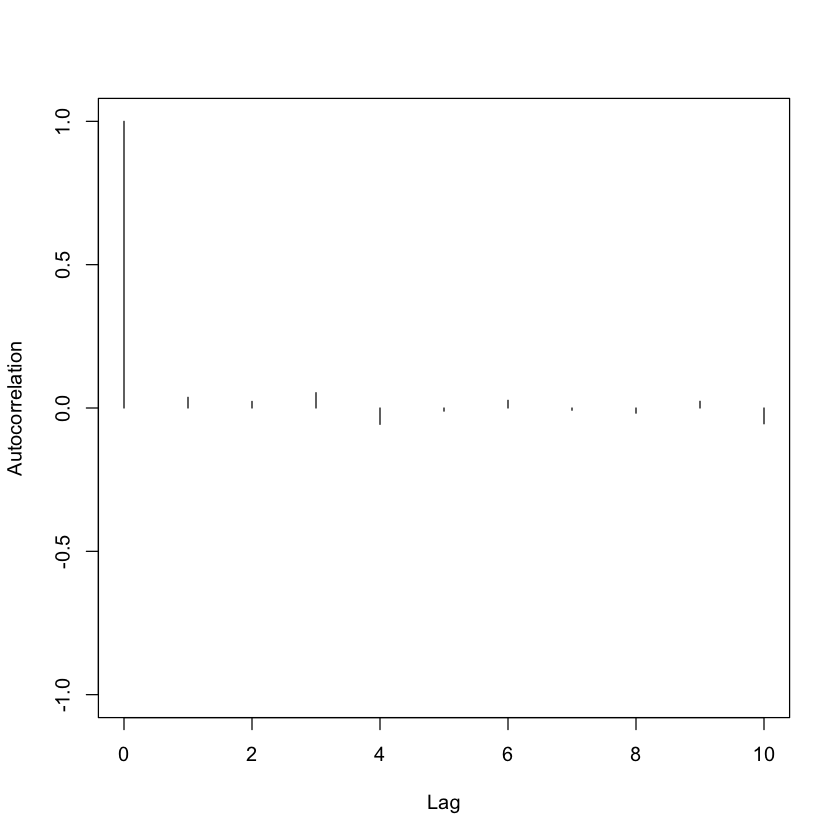

In [74]:
coda::autocorr.plot(as.mcmc(post2mu_thin), lag.max=10)

In [78]:
effectiveSize(as.mcmc(post2mu_thin))

var1 
 250

In [79]:
length(post2mu_thin)

[1] 250

- 희석 된 사슬을 주어 유효 샘플 크기를 계산합니다. 250이야. 실제 샘플이 얼마나 있니?

- 씬 인덱스 시퀀스의 길이를 볼 수 있습니다. 250입니다. 따라서 이 체인의 유효 샘플 크기는 실제 샘플 크기와 동일합니다. 값은 거의 상관 관계가 없기 때문입니다.

In [80]:
str(post0) # contains 10,000 iterations

List of 2
 $ mu   : num [1:10000] 0 0 0.315 0.315 0.949 ...
 $ accpt: num 0.382


In [81]:
coda::effectiveSize(as.mcmc(post0$mu)) # effective sample size of ~2,500

var1 
2537.924

- post0의 체인은 10,000 회 반복되지만 효과적인 샘플 크기는 약 2,500입니다. 즉,이 체인은 기본적으로 2,500 개의 독립적 인 몬테카를로 샘플을 제공합니다.

- post0의 체인은 post2보다 10 배 적은 반복 횟수를 가지지 만, 몬테카를로 효과적인 샘플 크기는 더 긴 (더 많은 상관 관계가있는) 체인보다 약 7 배 더 큽니다. 두 체인에서 같은 양의 정보를 얻으려면 70 만 개 이상의 반복에 대해 상관 체인을 실행해야합니다.

- 일반적으로 체인의 몬테카를로 유효 샘플 크기를 확인하는 것이 좋습니다. 모두 구치 평균 추정치이면 몇 백에서 수천의 효과적인 표본 크기가 충분해야합니다. 

- 그러나 95 % 후방 간격과 같은 것을 만들려면 분포의 바깥 쪽 가장자리를 신뢰할 수있는 예상치를 산출하려면 수천 개의 유효 샘플이 필요할 수 있습니다. Raftery 및 Lewis 진단을 사용하여 필요한 번호를 신속하게 계산할 수 있습니다.

In [82]:
raftery.diag(as.mcmc(post0$mu))


Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                       
 Burn-in  Total Lower bound  Dependence
 (M)      (N)   (Nmin)       factor (I)
 12       13218 3746         3.53      


In [84]:
raftery.diag(as.mcmc(post0$mu), q=0.005, r=0.001, s=0.95)


Quantile (q) = 0.005
Accuracy (r) = +/- 0.001
Probability (s) = 0.95 

You need a sample size of at least 19112 with these values of q, r and s

- post0의 첫 번째 체인의 경우 신뢰할 수있는 95 % 간격을 계산하는 데 약 3,700 개의 유효 샘플이 필요합니다. 

- 사슬에서 자기 상관을 사용하면 약 13,200 개의 총 샘플이 필요합니다. 신뢰할 수있는 99 % 간격을 만들려면 총 샘플이 적어도 19,100 개가 필요합니다.

#### Burn-in
- 우리는 체인의 초기 값이 체인이 얼마나 빨리 수렴하는지에 영향을 미칠 수있는 방법을 보았습니다.

- 우리의 초기 값이 사후 분포의 벌크 (bulk)와 거리가 먼 경우 사슬이 거기로 이동하는 데 약간의 시간이 걸릴 수 있습니다. 이전 예제에서 이것을 보았습니다.

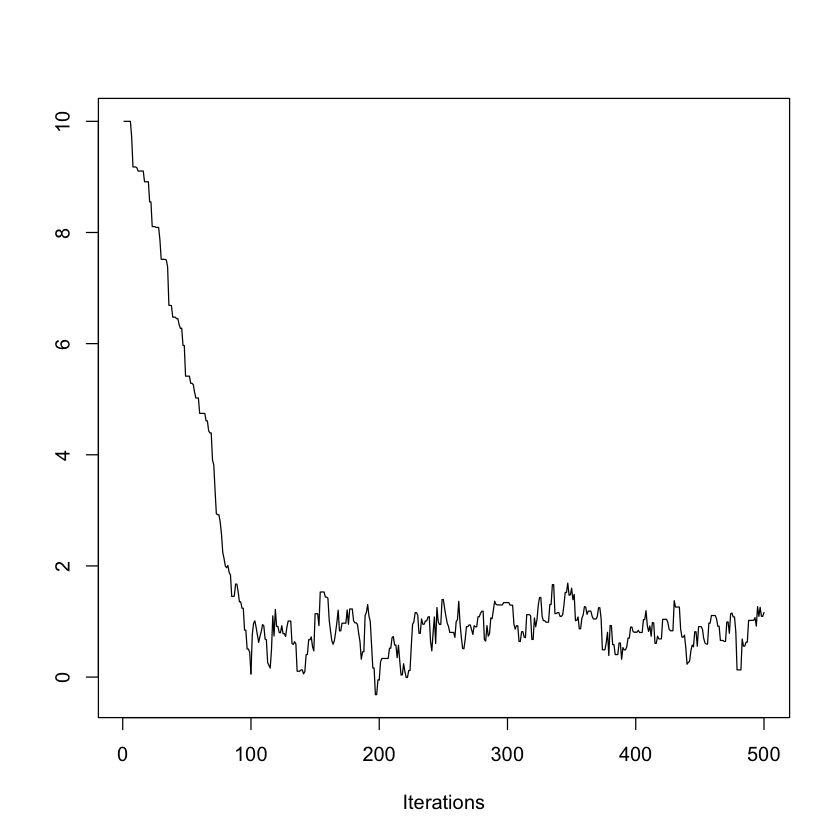

In [85]:
set.seed(62)
post3 = mh(n=n, ybar=ybar, n_iter=500, mu_init=10.0, cand_sd=0.3)
coda::traceplot(as.mcmc(post3$mu))

- 분명히 처음 100 회 정도의 반복은 고정 된 분포에서 나온 값을 반영하지 않으므로이 체인을 몬테카를로 추정에 사용하기 전에 폐기해야합니다. 

- 이를 "번인 (burn-in)"기간이라고합니다. 정지 된 배포에서 오는 것으로 보이지 않는 초기 반복을 항상 폐기해야합니다. 체인이 초기에 수렴 한 것처럼 보이더라도 초기 번인을 폐기하는 것이 더 안전합니다.

#### Multiple chains, Gelman-Rubin
- 우리가 진정한 고정 분포에 수렴했다는 것을 확신하고 싶다면, 각각 다른 시작 값을 가진 다중 체인을 시뮬레이션 할 수 있습니다.

In [86]:
set.seed(61)

nsim = 500
post1 = mh(n=n, ybar=ybar, n_iter=nsim, mu_init=15.0, cand_sd=0.4)
post1$accpt

[1] 0.616

In [88]:
post2 = mh(n=n, ybar=ybar, n_iter=nsim, mu_init=-5.0, cand_sd=0.4)
post2$accpt

[1] 0.628

In [89]:
post3 = mh(n=n, ybar=ybar, n_iter=nsim, mu_init=7.0, cand_sd=0.1)
post3$accpt

[1] 0.824

In [90]:
post4 = mh(n=n, ybar=ybar, n_iter=nsim, mu_init=23.0, cand_sd=0.5)
post4$accpt

[1] 0.59

In [91]:
post5 = mh(n=n, ybar=ybar, n_iter=nsim, mu_init=-17.0, cand_sd=0.4)
post5$accpt

[1] 0.6

In [92]:
pmc = mcmc.list(as.mcmc(post1$mu), as.mcmc(post2$mu), 
                as.mcmc(post3$mu), as.mcmc(post4$mu), as.mcmc(post5$mu))
str(pmc)

List of 5
 $ :Class 'mcmc'  atomic [1:500] 14.8 14 14 13.8 13.8 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 500 1
 $ :Class 'mcmc'  atomic [1:500] -4.86 -4.26 -4.19 -4.19 -4.03 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 500 1
 $ :Class 'mcmc'  atomic [1:500] 7 6.78 6.78 6.75 6.75 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 500 1
 $ :Class 'mcmc'  atomic [1:500] 23 22.2 22.2 22.2 22.2 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 500 1
 $ :Class 'mcmc'  atomic [1:500] -16.5 -16.5 -16.5 -16.5 -16.5 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 500 1
 - attr(*, "class")= chr "mcmc.list"


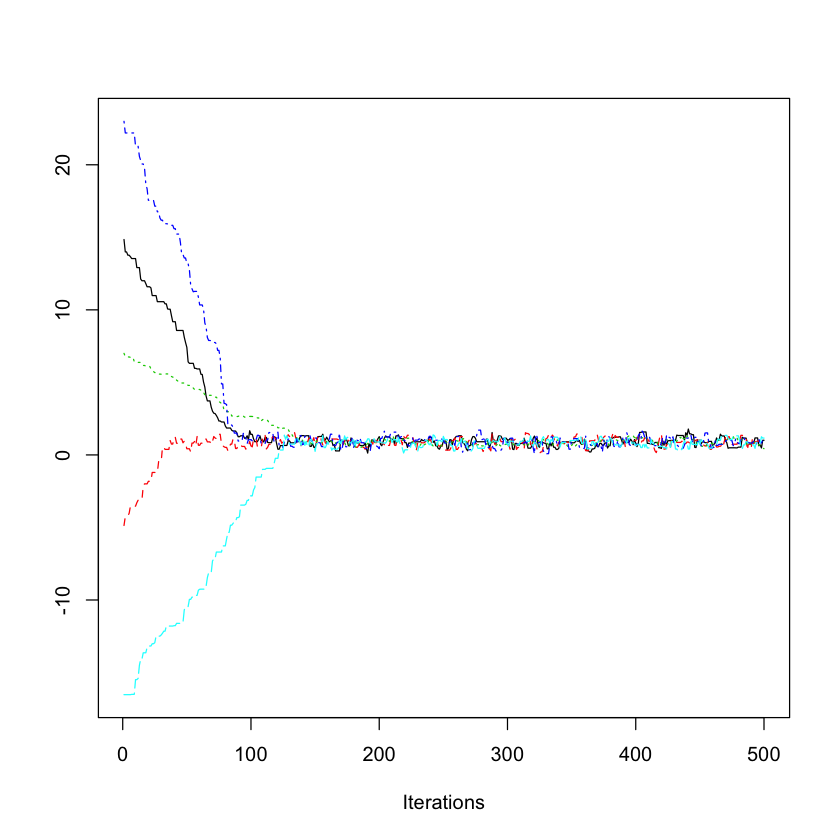

In [93]:
coda::traceplot(pmc)

- iteration 200 이후에, 모든 사슬들은 정지 된 (posterior) 분포를 탐색하고있는 것처럼 보인다. Gelman 및 Rubin 진단을 사용하여 시각적 결과를 백업 할 수 있습니다. 

- 이 진단 통계는 체인 내 변동성을 계산하여 체인 간 변동성을 비교합니다. 

- 모든 사슬이 고정 분포로 수렴한다면 사슬 간의 변동성은 상대적으로 작아야하며 진단에 의해보고 된 잠재적 인 축소 축소 요인은 1에 가깝습니다. 

- 값이 1보다 훨씬 크면 체인이 아직 수렴하지 않았다고 결론을 내릴 수 있습니다.

In [94]:
coda::gelman.diag(pmc)

Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.01       1.02


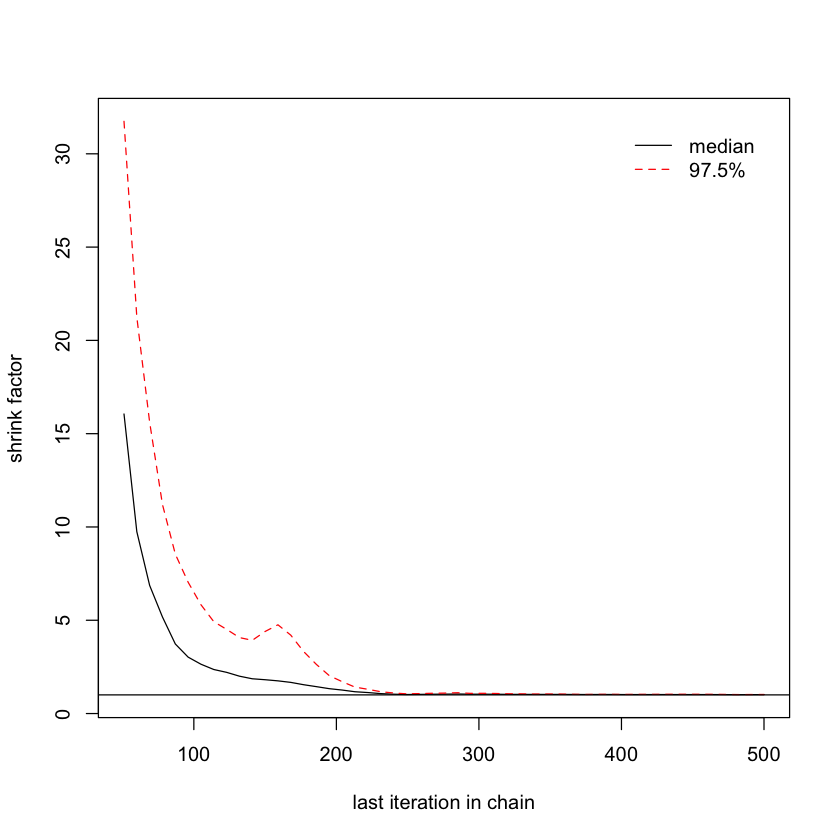

In [95]:
coda::gelman.plot(pmc)

- 플롯에서 우리는 처음 50 번의 반복 만 사용하면 잠재적 인 스케일 축소 요소 또는 "축소 계수"가 10에 가까워 체인이 수렴되지 않았 음을 알 수 있습니다.

- 그러나 반복 300 후에, "축소 요인"은 본질적으로 하나이며, 그때까지 우리는 아마도 수렴에 도달했다는 것을 나타냅니다. 물론 우리는 수렴에 도달하자마자 샘플링을 중단해서는 안됩니다. 대신 몬테카를로 추정을 위해 샘플을 저장해야합니다.

#### Monteh Carlo Estimation

- 마르코프 체인이 수렴했다는 것을 합리적으로 확신 할 수 있다면 사후 분포에서 몬테카를로 샘플로 처리 할 수 있습니다. 따라서 우리는 3 단원의 기술을 사용하여 샘플의 후방 평균 및 후방 간격과 같은 사후 수량을 직접 계산할 수 있습니다.

In [102]:
nburn = 1000 # remember to discard early iterations
post0$mu_keep = post0$mu[-c(1:1000)]
summary(as.mcmc(post0$mu_keep))


Iterations = 1:9000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 9000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.889449       0.304514       0.003210       0.006295 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.2915 0.6825 0.8924 1.0868 1.4890 


In [103]:
mean(post0$mu_keep > 1.0)

[1] 0.3554444